## Search Tree -> Similar Words

### Prepare Data

In [1]:
import pandas as pd

In [2]:
# Set input file path
csv_path = './data/pre_data_01.csv'

In [3]:
# Load csv file
df = pd.read_csv(csv_path)
df.head()

,id,url,title,text
0,13,https://zh.wikipedia.org/wiki?curid=13,数学,数学\n\n数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于...
1,18,https://zh.wikipedia.org/wiki?curid=18,哲学,哲学\n\n哲学（）是研究普遍的、根本的问题的学科，包括存在、知识、价值、理智、心灵、语言等...
2,21,https://zh.wikipedia.org/wiki?curid=21,文學,文学\n\n文学（），在最广泛的意义上，是任何单一的书面作品。\n\n更严格地说，文学写作被...
3,22,https://zh.wikipedia.org/wiki?curid=22,历史,历史\n\n历史（现代汉语词汇，古典文言文称之为史），指人类社会过去的事件和行动，以及对这些...
4,25,https://zh.wikipedia.org/wiki?curid=25,计算机科学,计算机科学\n\n计算机科学（，有时缩写为）是系统性研究信息与计算的理论基础以及它们在计算机...


In [4]:
# Check article number
print('Total Article Number: {}'.format(df.shape[0]))

Total Article Number: 39440


**Take the first 1000 articles for testing**

In [5]:
articles = df['text'].tolist()[:1000]

In [6]:
# View the content of first article 
articles[0][:500]

'数学\n\n数学是利用符号语言研究数量、结构、变化以及空间等概念的一门学科，从某种角度看属于形式科学的一种。数学透过抽象化和逻辑推理的使用，由计数、计算、量度和对物体形状及运动的观察而产生。数学家们拓展这些概念，为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理。\n\n基础数学的知识与运用总是个人与团体生活中不可或缺的一环。对数学基本概念的完善，早在古埃及、美索不达米亚及古印度内的古代数学文本便可观见，而在古希腊那里有更为严谨的处理。从那时开始，数学的发展便持续不断地小幅进展，至16世纪的文艺复兴时期，因为新的科学发现和数学革新两者的交互，致使数学的加速发展，直至今日。数学并成为许多国家及地区的教育范畴中的一部分。\n\n今日，数学使用在不同的领域中，包括科学、工程、医学、经济学和金融学等。数学对这些领域的应用通常被称为应用数学，有时亦会激起新的数学发现，并导致全新学科的发展，例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考。数学家也研究纯数学，就是数学本身的实质性内容，而不以任何实际应用为目标。虽然许多研究以纯数学开始，但其过程中也发现许多应用之处。\n'

**Build function to filter only words and numbers with Regualr Expression**

In [7]:
import re

In [8]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [9]:
articles = [token(str(art)) for art in articles]

In [10]:
articles = [''.join(art) for art in articles]

In [11]:
# View the content of first article after filtering
articles[0][:500]

'数学数学是利用符号语言研究数量结构变化以及空间等概念的一门学科从某种角度看属于形式科学的一种数学透过抽象化和逻辑推理的使用由计数计算量度和对物体形状及运动的观察而产生数学家们拓展这些概念为了公式化新的猜想以及从选定的公理及定义中建立起严谨推导出的定理基础数学的知识与运用总是个人与团体生活中不可或缺的一环对数学基本概念的完善早在古埃及美索不达米亚及古印度内的古代数学文本便可观见而在古希腊那里有更为严谨的处理从那时开始数学的发展便持续不断地小幅进展至16世纪的文艺复兴时期因为新的科学发现和数学革新两者的交互致使数学的加速发展直至今日数学并成为许多国家及地区的教育范畴中的一部分今日数学使用在不同的领域中包括科学工程医学经济学和金融学等数学对这些领域的应用通常被称为应用数学有时亦会激起新的数学发现并导致全新学科的发展例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考数学家也研究纯数学就是数学本身的实质性内容而不以任何实际应用为目标虽然许多研究以纯数学开始但其过程中也发现许多应用之处西方语言中数学一词源自于古希腊语的其有学习学问科学以及另外还有个较狭义且技术性的意思数学'

**Cut Words with Jieba**

In [12]:
import jieba

In [13]:
def cut(string):
    return ' '.join(jieba.cut(string))

In [14]:
articles = [cut(art) for art in articles]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/jc/l9vx9tp979g0tm976wjrgwkr0000gn/T/jieba.cache
Loading model cost 0.838 seconds.
Prefix dict has been built succesfully.


In [15]:
# View the content of first article after cutting words
articles[0][:500]

'数学 数学 是 利用 符号语言 研究 数量 结构 变化 以及 空间 等 概念 的 一门 学科 从 某种 角度看 属于 形式 科学 的 一种 数学 透过 抽象化 和 逻辑推理 的 使用 由 计数 计算 量度 和 对 物体 形状 及 运动 的 观察 而 产生 数学家 们 拓展 这些 概念 为了 公式化 新 的 猜想 以及 从 选定 的 公理 及 定义 中 建立 起 严谨 推导 出 的 定理 基础 数学 的 知识 与 运用 总是 个人 与 团体 生活 中 不可或缺 的 一环 对 数学 基本概念 的 完善 早 在 古埃及 美索不达米亚 及 古印度 内 的 古代 数学 文本 便 可观 见 而 在 古希腊 那里 有 更为 严谨 的 处理 从 那时 开始 数学 的 发展 便 持续 不断 地 小幅 进展 至 16 世纪 的 文艺复兴 时期 因为 新 的 科学 发现 和 数学 革新 两者 的 交互 致使 数学 的 加速 发展 直至 今日 数学 并 成为 许多 国家 及 地区 的 教育 范畴 中 的 一部分 今日 数学 使用 在 不同 的 领域 中 包括 科学 工程 医学 经济学 和 金融学 等 数学 对'

In [16]:
# Save the result to txt file
with open('./data/article-sentences-cut_01.txt', 'w') as f:
    for art in articles:
        f.write(art + '\n')

### Get Similar Words By Gensim Word2Vec

在gensim中，word2vec 相关的API都在包gensim.models.word2vec中。和算法有关的参数都在类gensim.models.word2vec.Word2Vec中。算法需要注意的参数有：

1. `sentences`: 我们要分析的语料，可以是一个列表，或者从文件中遍历读出。后面我们会有从文件读出的例子。

2. `size`: 词向量的维度，默认值是100。这个维度的取值一般与我们的语料的大小相关，如果是不大的语料，比如小于100M的文本语料，则使用默认值一般就可以了。如果是超大的语料，建议增大维度。

3. `window`: 即词向量上下文最大距离，这个参数在我们的算法原理篇中标记为c，window越大，则和某一词较远的词也会产生上下文关系。默认值为5。在实际使用中，可以根据实际的需求来动态调整这个window的大小。如果是小语料则这个值可以设的更小。对于一般的语料这个值推荐在[5,10]之间。

4. `sg`: 即我们的word2vec两个模型的选择了。如果是0， 则是CBOW模型，是1则是Skip-Gram模型，默认是0即CBOW模型。

5. `hs`: 即我们的word2vec两个解法的选择了，如果是0， 则是Negative Sampling，是1的话并且负采样个数negative大于0， 则是Hierarchical Softmax。默认是0即Negative Sampling。

6. `negative`: 即使用Negative Sampling时负采样的个数，默认是5。推荐在[3,10]之间。这个参数在我们的算法原理篇中标记为neg。

7. `cbow_mean`: 仅用于CBOW在做投影的时候，为0，则算法中的xw为上下文的词向量之和，为1则为上下文的词向量的平均值。在我们的原理篇中，是按照词向量的平均值来描述的。个人比较喜欢用平均值来表示xw,默认值也是1,不推荐修改默认值。

8. `min_count`: 需要计算词向量的最小词频。这个值可以去掉一些很生僻的低频词，默认是5。如果是小语料，可以调低这个值。

9. `iter`: 随机梯度下降法中迭代的最大次数，默认是5。对于大语料，可以增大这个值。

10. `alpha`: 在随机梯度下降法中迭代的初始步长。算法原理篇中标记为η，默认是0.025。

11. `min_alpha`: 由于算法支持在迭代的过程中逐渐减小步长，min_alpha给出了最小的迭代步长值。随机梯度下降中每轮的迭代步长可以由iter，alpha， min_alpha一起得出。对于大语料，需要对alpha, min_alpha,iter一起调参，来选择合适的三个值。

In [17]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

**Create Model**

In [18]:
articles_word2vec = Word2Vec(LineSentence('./data/article-sentences-cut_01.txt'),
                            sg=0, min_count=1, size=100, window=5, workers=8)

**Test**

In [19]:
articles_word2vec.wv.most_similar('唐朝', topn=10)

[('清朝', 0.9769458770751953),
 ('汉朝', 0.961111307144165),
 ('东汉', 0.9574472904205322),
 ('明朝', 0.9525812864303589),
 ('王朝', 0.9488171339035034),
 ('五代十国', 0.9329332709312439),
 ('罗马帝国', 0.9307292699813843),
 ('鸦片战争', 0.9306935667991638),
 ('元朝', 0.9245981574058533),
 ('南北朝', 0.9226831197738647)]

**More Data, Better Results**
- cut words
- We need merge the general dataset like wikipedia with specific domain dataset like news data

In [20]:
from collections import defaultdict

In [21]:
def get_related_words(init_words, model, max_size, top_n):
    """
    @ init_words: initial words we already know
    @ model: the word2vec model
    @ max_size: the maximum number of words need to see
    @ top_n: the number of top similar words
    """
    
    unseen_list = init_words
    
    seen = defaultdict(int)
    
    while unseen_list and len(seen) < max_size:
        node = unseen_list.pop(0)
        
        sub_nodes = [w for w, s in model.wv.most_similar(node, topn=top_n)]
        
        unseen_list += sub_nodes
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    seen_rank = sorted(seen.items(), key=lambda x: x[1], reverse=True)
    
    return seen_rank

**Test**

In [22]:
# View totlay vovabulary number in corpus
len(articles_word2vec.wv.vocab)

137715

In [23]:
related_words = get_related_words(['唐朝', '唐太宗'], articles_word2vec, max_size=1000, top_n=10)

In [24]:
related_top_ten = related_words[: 10]
print(related_top_ten)

[('罗马帝国', 266), ('五代十国', 198), ('隋唐', 164), ('奥斯曼帝国', 162), ('秦朝', 158), ('元朝', 152), ('清末', 146), ('南诏', 134), ('中后期', 132), ('汉朝', 128)]


## TF_IDF Key Words

**Term Frequency_Inverse Document Frequency**

$$ tf_{t,d} = \frac{n_{t,d}}{\sum_{1}^{k}n_{k,d}}$$<br>
$$ idf_t = \log_{10}{\frac{N}{df_t}}$$

$$ {tf-idf}_{t,d} = tf_{t,d} \times idf_t $$

- $ n_{t,d} $ : term $t$ frequency in document $d$
- $ \sum_{1}^{k}n_{k,d} $ : sum of all terms frequency in document $d$
- $ N $ : total number of documents
- $ df_t $ : number of documents which include term $t$

In [25]:
articles[0][:500]

'数学 数学 是 利用 符号语言 研究 数量 结构 变化 以及 空间 等 概念 的 一门 学科 从 某种 角度看 属于 形式 科学 的 一种 数学 透过 抽象化 和 逻辑推理 的 使用 由 计数 计算 量度 和 对 物体 形状 及 运动 的 观察 而 产生 数学家 们 拓展 这些 概念 为了 公式化 新 的 猜想 以及 从 选定 的 公理 及 定义 中 建立 起 严谨 推导 出 的 定理 基础 数学 的 知识 与 运用 总是 个人 与 团体 生活 中 不可或缺 的 一环 对 数学 基本概念 的 完善 早 在 古埃及 美索不达米亚 及 古印度 内 的 古代 数学 文本 便 可观 见 而 在 古希腊 那里 有 更为 严谨 的 处理 从 那时 开始 数学 的 发展 便 持续 不断 地 小幅 进展 至 16 世纪 的 文艺复兴 时期 因为 新 的 科学 发现 和 数学 革新 两者 的 交互 致使 数学 的 加速 发展 直至 今日 数学 并 成为 许多 国家 及 地区 的 教育 范畴 中 的 一部分 今日 数学 使用 在 不同 的 领域 中 包括 科学 工程 医学 经济学 和 金融学 等 数学 对'

### Calculate Term Frequency

In [26]:
def tf(word, document):
    """
    Gets the term frequency of a @word in a @document.
    """
    words = document.split()
    
    return sum(1 for w in words if w == word)/ len(document)

**Test term '的' frequency in firts article**

In [27]:
tf('数学', articles[0])

0.013079932923420905

### Calculate Inverse Document Frequency

In [28]:
def document_frequency(word, corpus):
    return sum(1 for d in corpus if word in d)

**Test term '数学' document frequency in corpus**

In [29]:
document_frequency('数学', articles)

114

In [30]:
import math

In [31]:
def idf(word, corpus):
    """Gets the inversed document frequency"""
    return math.log10(len(corpus) / document_frequency(word, corpus))

**Test**

In [32]:
idf('数学', articles)

0.9430951486635274

In [34]:
idf('的', articles)

0.04914854111145356

### Calculate TF_IDF

In [35]:
def get_keywords_of_a_document(document, corpus):
    # Get unique words in a document
    words = set(document.split())
    
    tf_idf = [
        (w, tf(w, document) * idf(w, corpus)) for w in words
    ]
    
    tf_idf_rank = sorted(tf_idf, key=lambda x: x[1], reverse=True)
    
    return tf_idf_rank

**Test**

In [36]:
get_keywords_of_a_document(articles[0], articles)[:10]

[('数学', 0.012335621284922604),
 ('数学家', 0.0031247798139564065),
 ('领域', 0.0025082953107757842),
 ('公理', 0.0024594745667970933),
 ('纯数学', 0.0021121062079767616),
 ('科学', 0.0020976797524307703),
 ('定理', 0.0019505058634954656),
 ('几何', 0.0017326203826392968),
 ('的', 0.0017033032693740194),
 ('研究', 0.0016503017180880518)]

In [38]:
get_keywords_of_a_document(articles[1], articles)[:10]

[('哲学', 0.007055658702075845),
 ('柏拉图', 0.0023660800470852715),
 ('形而上学', 0.00197108132781157),
 ('西方哲学', 0.0019542758187639283),
 ('哲学家', 0.0018807317849405178),
 ('黑格尔', 0.0018443832116174356),
 ('的', 0.001678752485372525),
 ('笛卡尔', 0.0016125485597009456),
 ('康德', 0.0015139600372767025),
 ('现象学', 0.0013492809473951367)]

**Command for viewing cost time in function**

In [37]:
# %prun get_keywords_of_a_document(articles[0], articles)[:10]

## WordCloud

In [44]:
import wordcloud

In [45]:
# Load font file
wc = wordcloud.WordCloud('./data/SourceHanSerifSC-Regular.otf')

In [114]:
city_article_keywords = get_keywords_of_a_document(articles[155], articles)[: 40]

In [115]:
city_article_keywords_dict = {w: score for w, score in city_article_keywords}

In [116]:
import matplotlib.pyplot as plt

%matplotlib inline

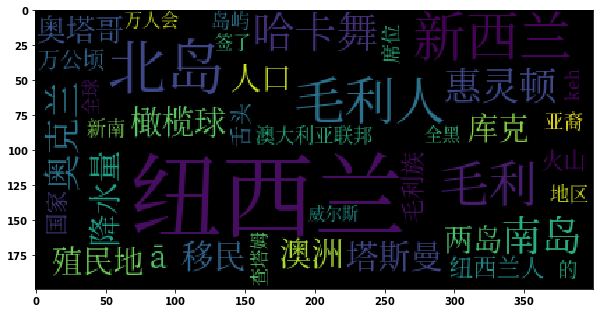

In [117]:
plt.figure(figsize=(10, 12))
plt.imshow(wc.generate_from_frequencies(city_article_keywords_dict))
plt.show()

**Plot Wordcloud With Image Mask**

In [118]:
from PIL import Image
import numpy as np

In [124]:
city_mask = np.array(Image.open('./data/mask.png'))

In [120]:
wordcloud_with_mask = wordcloud.WordCloud(
    font_path='./data/SourceHanSerifSC-Regular.otf', 
    mask=city_mask
    )

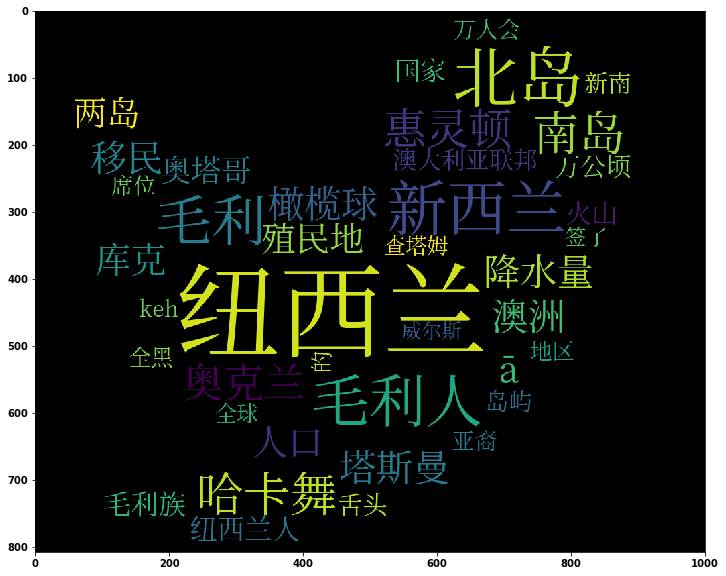

In [121]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_with_mask.generate_from_frequencies(city_article_keywords_dict))
plt.show()

## TF_IDF Vectorized

### Cosine Similarity

![](https://github.com/pchen12567/picture_store/blob/master/AI_For_NLP/cosine_similarity.jpg?raw=true)